# IMPORT

In [1]:
import pandas as pd
from soil_fertility.components.data_pipeline.data_ingestion import DataIngestion
from soil_fertility.components.data_pipeline.data_transformation import DataTransformation

import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

# INGESTION

In [2]:
data_path="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset1.csv"

raw=pd.read_csv(data_path)
obj = DataIngestion()
part,train_path,test_path= obj.init_ingestion(
    data_path
)



In [7]:
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
df = pd.concat([train_df, test_df], ignore_index=True)


In [8]:
tranformation_obj = DataTransformation()
part,preprocessor,processed_train_path,processed_test_path = tranformation_obj.transform(
    train_path,test_path,target="Fertility"
)

train_df=pd.read_csv(processed_train_path)
test_df=pd.read_csv(processed_test_path)

names=list(df.columns)
train_df = train_df.rename(columns=dict(zip(train_df.columns, names)))
test_df = test_df.rename(columns=dict(zip(test_df.columns, names)))

train_coolumns=  Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM',
       'Fertility'],
      dtype='object')
test_coolumns=  Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM',
       'Fertility'],
      dtype='object')


In [9]:
train_df.drop('OM',axis=1,inplace=True)

In [10]:
test_df.drop('OM',axis=1,inplace=True)

# Transformation 

In [13]:
from soil_fertility.components.model_pipeline.models.decision_tree import DecisionTree
from soil_fertility.components.model_pipeline.models.random_forest import RandomForest
from soil_fertility.components.model_pipeline.model_trainer import ModelTrainer

In [ ]:
# model_trainer=ModelTrainer()
# result_default=  model_trainer.init_training(train_data=train_df,
#                                      test_data=test_df,
#                                      target_column="Fertility",
#                                      mode="default",save_model=True)

In [15]:
result_default

{'metrics': {'decision_tree': {'accuracy': 0.8579545454545454,
   'micro_average': {'precision': 0.8579545454545454,
    'recall': 0.8579545454545454,
    'f1_score': 0.8579545454545454},
   'macro_average': {'precision': 0.6667098459578785,
    'recall': 0.7477124183006536,
    'f1_score': 0.6887874030731173},
   'metrics_per_class': {'0.0': {'precision': 0.863013698630137,
     'recall': 0.9,
     'f1_score': 0.881118881118881,
     'specificity': 0.9320388349514563},
    '1.0': {'precision': 0.9148936170212766,
     'recall': 0.8431372549019608,
     'f1_score': 0.8775510204081632,
     'specificity': 0.8048780487804879},
    '2.0': {'precision': 0.2222222222222222,
     'recall': 0.5,
     'f1_score': 0.30769230769230765,
     'specificity': 0.9880239520958084}}},
  'random_forest': {'accuracy': 0.4715909090909091,
   'micro_average': {'precision': 0.4715909090909091,
    'recall': 0.4715909090909091,
    'f1_score': 0.4715909090909091},
   'macro_average': {'precision': 0.45396825

In [26]:
def dict_to_df(data):
    models = []
    accuracies = []
    micro_avg_precisions = []
    micro_avg_recalls = []
    micro_avg_f1_scores = []
    macro_avg_precisions = []
    macro_avg_recalls = []
    macro_avg_f1_scores = []
    precisions_0 = []
    recalls_0 = []
    f1_scores_0 = []
    precisions_1 = []
    recalls_1 = []
    f1_scores_1 = []
    precisions_2 = []
    recalls_2 = []
    f1_scores_2 = []
    specificities_0 = []
    specificities_1 = []
    specificities_2 = []
    for model, metrics in data.items():
        models.append(model)
        accuracies.append(metrics['accuracy'])
        micro_avg_precisions.append(metrics['micro_average']['precision'])
        micro_avg_recalls.append(metrics['micro_average']['recall'])
        micro_avg_f1_scores.append(metrics['micro_average']['f1_score'])
        macro_avg_precisions.append(metrics['macro_average']['precision'])
        macro_avg_recalls.append(metrics['macro_average']['recall'])
        macro_avg_f1_scores.append(metrics['macro_average']['f1_score'])

        metrics_per_class = metrics['metrics_per_class']
        precisions_0.append(metrics_per_class['0.0']['precision'])
        recalls_0.append(metrics_per_class['0.0']['recall'])
        f1_scores_0.append(metrics_per_class['0.0']['f1_score'])
        specificities_0.append(metrics_per_class['0.0']['specificity'])

        precisions_1.append(metrics_per_class['1.0']['precision'])
        recalls_1.append(metrics_per_class['1.0']['recall'])
        f1_scores_1.append(metrics_per_class['1.0']['f1_score'])
        specificities_1.append(metrics_per_class['1.0']['specificity'])

        precisions_2.append(metrics_per_class['2.0']['precision'])
        recalls_2.append(metrics_per_class['2.0']['recall'])
        f1_scores_2.append(metrics_per_class['2.0']['f1_score'])
        specificities_2.append(metrics_per_class['2.0']['specificity'])

    # Create a DataFrame
    df = pd.DataFrame({
        'model': models,
        'accuracy': accuracies,
        'MicroAvg_precision': micro_avg_precisions,
        'MicroAvg_recall': micro_avg_recalls,
        'MicroAvg_f1_score': micro_avg_f1_scores,
        'MacroAvg_precision': macro_avg_precisions,
        'MacroAvg_recall': macro_avg_recalls,
        'MacroAvg_f1_score': macro_avg_f1_scores,
        'precision_0': precisions_0,
        'recall_0': recalls_0,
        'f1_score_0': f1_scores_0,
        'specificity_0': specificities_0,
        'precision_1': precisions_1,
        'recall_1': recalls_1,
        'f1_score_1': f1_scores_1,
        'specificity_1': specificities_1,
        'precision_2': precisions_2,
        'recall_2': recalls_2,
        'f1_score_2': f1_scores_2,
        'specificity_2': specificities_2
    })

    return df

In [33]:
df.columns

Index(['model', 'accuracy', 'MicroAvg_precision', 'MicroAvg_recall',
       'MicroAvg_f1_score', 'MacroAvg_precision', 'MacroAvg_recall',
       'MacroAvg_f1_score', 'precision_0', 'recall_0', 'f1_score_0',
       'specificity_0', 'precision_1', 'recall_1', 'f1_score_1',
       'specificity_1', 'precision_2', 'recall_2', 'f1_score_2',
       'specificity_2'],
      dtype='object')

In [35]:
df.to_csv('default_results.csv')

In [36]:
df_grid.to_csv('gris_results.csv')

# GRID SEARCH

In [16]:
# model_trainer2=ModelTrainer()
# result2=  model_trainer.init_training(train_data=train_df,
#                                      test_data=test_df,
#                                      target_column="Fertility",
#                                      mode="gridsearch",save_model=True)

In [17]:
result2

{'metrics': {'decision_tree': {'accuracy': 0.875,
   'micro_average': {'precision': 0.875, 'recall': 0.875, 'f1_score': 0.875},
   'macro_average': {'precision': 0.6922983133509449,
    'recall': 0.7590102707749766,
    'f1_score': 0.715308755917893},
   'metrics_per_class': {'0.0': {'precision': 0.8648648648648649,
     'recall': 0.9142857142857143,
     'f1_score': 0.888888888888889,
     'specificity': 0.9411764705882353},
    '1.0': {'precision': 0.9263157894736842,
     'recall': 0.8627450980392157,
     'f1_score': 0.8934010152284264,
     'specificity': 0.8271604938271605},
    '2.0': {'precision': 0.2857142857142857,
     'recall': 0.5,
     'f1_score': 0.36363636363636365,
     'specificity': 0.9881656804733728}}},
  'random_forest': {'accuracy': 0.6761363636363636,
   'micro_average': {'precision': 0.6761363636363636,
    'recall': 0.6761363636363636,
    'f1_score': 0.6761363636363636},
   'macro_average': {'precision': 0.4797958514772674,
    'recall': 0.48450046685340803,


In [ ]:
df_grid=dict_to_df(result2['metrics'])

In [38]:
train_df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,0.849850,0.282443,0.828431,0.220183,0.150685,0.239316,0.456215,0.250000,0.264023,0.368159,0.386674,0.084906,1.0
1,0.753754,0.413634,0.431373,0.495413,0.465753,0.282051,0.413842,0.264706,0.131528,0.069652,0.967996,0.273585,1.0
2,0.867868,0.213740,0.776144,0.954128,0.616438,0.495726,0.572740,0.367647,0.584139,0.875622,0.798006,0.339623,1.0
3,0.489489,0.595420,0.897059,0.302752,0.438356,0.495726,0.359463,0.617647,0.802708,0.328358,0.805876,0.283019,0.0
4,0.849850,0.870229,0.465686,0.431193,0.561644,0.666667,0.466102,0.441176,0.101547,0.636816,0.617524,0.216981,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.339339,0.396947,0.447712,0.495413,0.780822,0.914530,0.401836,0.647059,0.562863,0.611940,0.386674,0.320755,0.0
698,0.378378,0.435115,0.465686,0.651376,0.520548,0.589744,0.293785,0.294118,0.323985,0.273632,0.286988,0.028302,0.0
699,0.792793,0.564885,0.741830,0.064220,0.260274,0.829060,0.338277,0.470588,0.582205,0.189055,0.127492,0.415094,1.0
700,0.942943,0.396947,0.431373,0.449541,0.397260,0.000000,0.615113,0.411765,0.668279,0.442786,0.381952,0.415094,1.0


In [34]:
from soil_fertility.components.model_pipeline.models.KNN import KNN

knn= KNN()

X=train_df.drop('Fertility',axis=1)
y=train_df['Fertility']

X_test=test_df.drop('Fertility',axis=1)
y_test=test_df['Fertility']
knn.fit(X,y)
y_test_pred=knn.predict(X_test)


In [16]:
from soil_fertility.components.utils.metrics import *
metrics_per_class = {}
report = {"metrics": {}}
classes = np.unique(y_test)
for class_label in classes:
    prec, rec, f1 = precision_recall_f1(y_test, y_test_pred, class_label)
    spec = specificity(y_test, y_test_pred, class_label)
    metrics_per_class[str(class_label)] = {
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "specificity": spec,
    }
    accuracy_score = accuracy(y_test, y_test_pred)
micro_precision, micro_recall, micro_f1 = micro_average(
    y_test, y_test_pred, classes
)
macro_precision, macro_recall, macro_f1 = macro_average(
    y_test, y_test_pred, classes
)
report["metrics"]["KNN"] = {
    "accuracy": accuracy_score,
    "micro_average": {
        "precision": micro_precision,
        "recall": micro_recall,
        "f1_score": micro_f1,
    },
    "macro_average": {
        "precision": macro_precision,
        "recall": macro_recall,
        "f1_score": macro_f1,
    },
    "metrics_per_class": metrics_per_class,
}

In [18]:
report

{'metrics': {'KNN': {'accuracy': 0.8409090909090909,
   'micro_average': {'precision': 0.8409090909090909,
    'recall': 0.8409090909090909,
    'f1_score': 0.8409090909090909},
   'macro_average': {'precision': 0.5640683988452143,
    'recall': 0.5777777777777778,
    'f1_score': 0.5695272487763886},
   'metrics_per_class': {'0.0': {'precision': 0.7974683544303798,
     'recall': 0.9,
     'f1_score': 0.8456375838926175,
     'specificity': 0.9278350515463918},
    '1.0': {'precision': 0.8947368421052632,
     'recall': 0.8333333333333334,
     'f1_score': 0.8629441624365481,
     'specificity': 0.7901234567901234},
    '2.0': {'precision': 0.0,
     'recall': 0.0,
     'f1_score': 0,
     'specificity': 0.9770114942528736}}}}}

In [23]:
resss=report['metrics']

In [27]:
knn_df=dict_to_df(resss)

In [ ]:
full_df=

In [29]:
grid_data=pd.read_csv('/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/notebook/gris_results.csv')
normal_data=pd.read_csv('/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/notebook/default_results.csv')


In [32]:
default_df=pd.concat([normal_data,knn_df])

In [33]:
default_df.to_csv('default_final.csv')

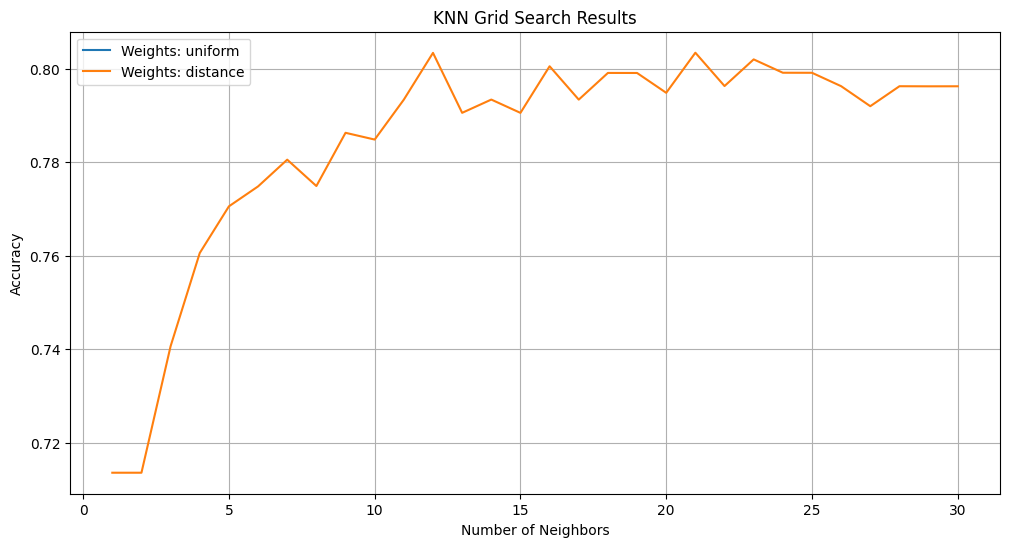

In [40]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X=train_df.drop('Fertility',axis=1)
y=train_df['Fertility']

X_test=test_df.drop('Fertility',axis=1)
y_test=test_df['Fertility']
#KNN Classifier
knn = KNeighborsClassifier()

# Parameters grid
param_grid = {'n_neighbors': range(1, 31), 'weights': ['distance']}

# GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Extracting results
results = pd.DataFrame(grid_search.cv_results_)

# Plotting
plt.figure(figsize=(12, 6))
for weight in ['uniform', 'distance']:
    subset = results[results['param_weights'] == weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'Weights: {weight}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from soil_fertility.components.utils.metrics import *
metrics_per_class = {}
report = {"metrics": {}}
classes = np.unique(y_test)
for class_label in classes:
    prec, rec, f1 = precision_recall_f1(y_test, y_test_pred, class_label)
    spec = specificity(y_test, y_test_pred, class_label)
    metrics_per_class[str(class_label)] = {
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "specificity": spec,
    }
    accuracy_score = accuracy(y_test, y_test_pred)
micro_precision, micro_recall, micro_f1 = micro_average(
    y_test, y_test_pred, classes
)
macro_precision, macro_recall, macro_f1 = macro_average(
    y_test, y_test_pred, classes
)
report["metrics"]["KNN"] = {
    "accuracy": accuracy_score,
    "micro_average": {
        "precision": micro_precision,
        "recall": micro_recall,
        "f1_score": micro_f1,
    },
    "macro_average": {
        "precision": macro_precision,
        "recall": macro_recall,
        "f1_score": macro_f1,
    },
    "metrics_per_class": metrics_per_class,
}